In [83]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import numpy as np
import pickle

In [2]:
url = "https://news.gallup.com/poll/1600/congress-public.aspx"
figure_id = "962005281600200528"

In [5]:
res = requests.get(url)
if res.status_code == 200:
    soup = BeautifulSoup(res.text)

In [10]:
table = soup.find("figure", {"id":figure_id}).find("table")

In [14]:
table

<table aria-labelledby="caption-20210825204046" class="mobile">
<thead>
<tr>
<td> </td>
<th colspan="1" scope="col">Approve</th>
<th colspan="1" scope="col">Disapprove</th>
<th colspan="1" scope="col">No opinion</th>
</tr>
<tr>
<td> </td>
<th colspan="1"><span class="col-unit">%</span></th>
<th colspan="1"><span class="col-unit">%</span></th>
<th colspan="1"><span class="col-unit">%</span></th>
</tr>
</thead>
<tbody>
<tr>
<th scope="row">2021 Aug 2-17</th>
<td data-th="Approve" data-thunit="%">28</td>
<td data-th="Disapprove" data-thunit="%">69</td>
<td data-th="No opinion" data-thunit="%">3</td>
</tr>
<tr>
<th scope="row">2021 Jul 6-21</th>
<td data-th="Approve" data-thunit="%">26</td>
<td data-th="Disapprove" data-thunit="%">67</td>
<td data-th="No opinion" data-thunit="%">6</td>
</tr>
<tr>
<th scope="row">2021 Jun 1-18</th>
<td data-th="Approve" data-thunit="%">26</td>
<td data-th="Disapprove" data-thunit="%">71</td>
<td data-th="No opinion" data-thunit="%">3</td>
</tr>
<tr>
<th sco

In [15]:
rows = table.find('tbody').find_all('tr')

In [37]:
data_json = []
for row in rows:
    data_row = {
        'date': row.find('th').text, 
        'approve': row.find('td', {'data-th':'Approve'}).text, 
        'disapprove': row.find('td', {'data-th':'Disapprove'}).text, 
        'no_opinion': row.find('td', {'data-th':'No opinion'}).text
    }
    
    data_json.append(data_row)

In [43]:
df = pd.DataFrame(data_json)
df[['approve', 'disapprove', 'no_opinion']] = df[['approve', 'disapprove', 'no_opinion']].astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 4 columns):
approve       365 non-null int64
date          365 non-null object
disapprove    365 non-null int64
no_opinion    365 non-null int64
dtypes: int64(3), object(1)
memory usage: 11.5+ KB


In [50]:
df[['date', 'drop']] = df['date'].str.split('-', n=1, expand=True)

In [68]:
df['date'] = pd.to_datetime(df['date']
                            .str.replace('July', 'Jul')
                            .str.replace('June', 'Jun')
                            .str.replace(r' \^', ''), 
                            format="%Y %b %d")

In [72]:
df.set_index('date', inplace=True)
df.head()

,approve,disapprove,no_opinion,drop
date,,,,
2021-08-02,28,69,3,17
2021-07-06,26,67,6,21
2021-06-01,26,71,3,18
2021-05-03,31,63,5,18
2021-04-01,33,62,5,21


In [70]:
import matplotlib.pyplot as plt
%matplotlib inline

In [81]:
idx_filter = df.index.to_series().gt('1989-01-01')

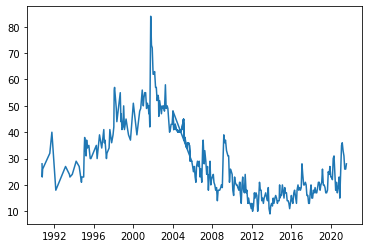

In [82]:
final_df = df.loc[idx_filter, :]

plt.plot(final_df['approve'])
plt.show()

In [88]:
final_df.to_pickle('./gallup_congress_approval.pkl')